In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np
import os
import pandas as pd
from src.dataPipeline import DataPipeline

os.chdir('..')

imputer = KNNImputer(n_neighbors=5)
#imputer = SimpleImputer(strategy='mean')

dp = DataPipeline()
df = dp.runPipeline(normalizeAndStandardize=True, get_dummies=False, imputer=imputer)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:44: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:76: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

In [2]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



y = df['type_unified']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X = df.drop(columns=['type_unified'])

In [20]:


train_test_split_ratio = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_split_ratio, random_state=42)

model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, reg_alpha=0.9, reg_lambda=0.9, objective='multi:softmax', num_class=len(label_encoder.classes_))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Test Accuracy: {accuracy:.3f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}')


# Train 
y_pred_train = model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='macro')
recall = recall_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_train, y_pred_train, average='macro')

print(f'Train Accuracy: {accuracy:.3f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}')

Test Accuracy: 0.652 | Precision: 0.343 | Recall: 0.165 | F1: 0.186
Train Accuracy: 0.781 | Precision: 0.843 | Recall: 0.503 | F1: 0.591


C:\FHNW_Programmiersachen\5_Sem\immo_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


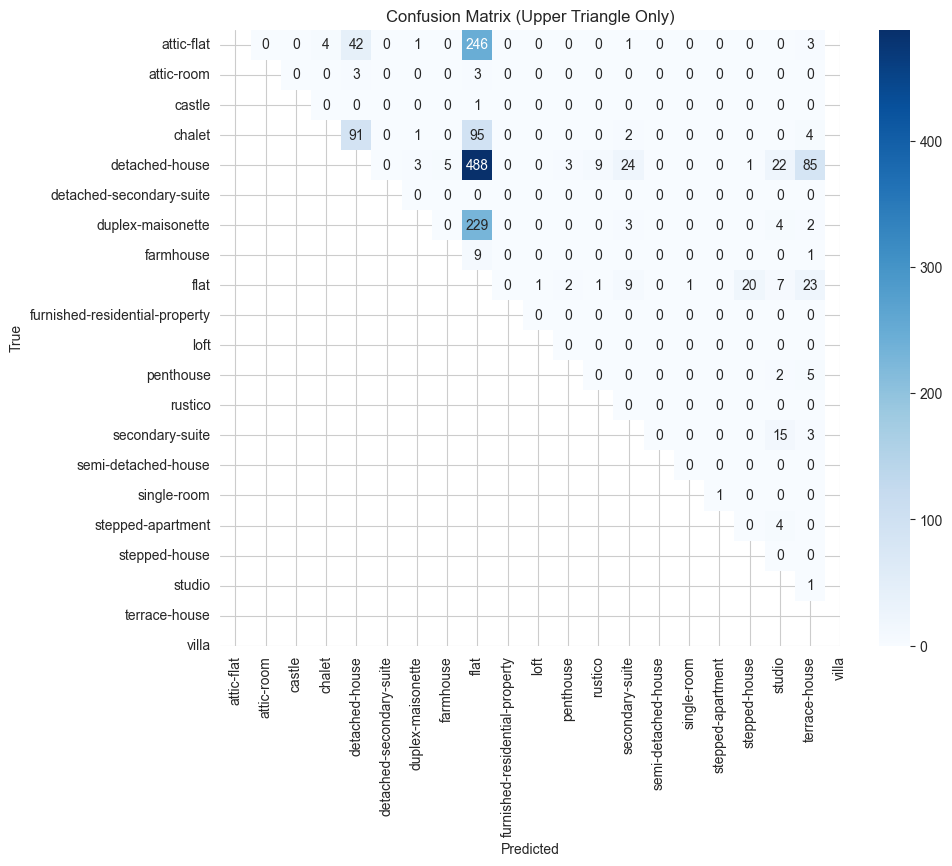

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a mask for the lower triangle
mask = np.tril(np.ones_like(conf_matrix, dtype=bool))

# Mask the lower triangle by setting it to NaN
conf_matrix_upper = np.where(mask, np.nan, conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, mask=mask)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Upper Triangle Only)')
plt.show()
